<a href="https://colab.research.google.com/github/gracesjy/mldl_study/blob/main/11_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **인피니티북스 "누구나 쉽게 배우는 딥러닝 스타트"(1판) 교재 소스 코드**

## **11장 합성곱신경망응용**
---
* 출판사 : 인피니티북스( https://www.infinitybooks.co.kr )
* 딥러닝 스타트 저자 : 박동규
*  소스코드 저장소 : https://github.com/dongupak/DLstart
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저자 표기와 함께 배포해 주십시오.
 * https://www.yes24.com/Product/Goods/124152667
 * 책의 오류는 dongupak@gmail.com 으로 알려주십시오.
---

### 01 과적합을 방지하는 방법

In [ ]:
model.fit(train_images, train_labels,\
        epochs=10, validation_split=0.25)

In [ ]:
# 드롭아웃을 적용한 모델
model = keras.models.Sequential([
        keras.layers.Conv2D(input_shape = (28, 28, 1),
                            kernel_size = (3, 3), padding = 'same',
                            filters = 32),
        keras.layers.MaxPooling2D((2, 2), strides=2),
        keras.layers.Dropout(.2),
        keras.layers.Conv2D(kernel_size = (3, 3), padding = 'same',
                            filters = 64),
        keras.layers.MaxPooling2D((2, 2), strides=2),
        keras.layers.Conv2D(kernel_size = (3, 3), padding = 'same',
                            filters = 32),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dropout(.2),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) =\
    fashion_mnist.load_data()

train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]
train_images, test_images = train_images / 255, test_images / 255

model = keras.models.Sequential( [
   keras.layers.Conv2D(input_shape = (28, 28, 1),
                       kernel_size = (3,3), padding = 'same',
                       filters = 32),
   keras.layers.MaxPooling2D((2, 2), strides=2),
   keras.layers.Dropout(.2),
   keras.layers.Conv2D(kernel_size = (3,3), padding ='same',
                       filters = 64),
   keras.layers.MaxPooling2D((2, 2), strides=2),
   keras.layers.Dropout(.3),
   keras.layers.Conv2D(kernel_size = (3,3), padding = 'same',
                       filters = 32),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation = 'relu'),
   keras.layers.Dropout(.2),
   keras.layers.Dense(32, activation = 'relu'),
   keras.layers.Dense(10, activation = 'softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [ ]:
# 입력 데이터에 합성곱층을 적용시키자
model.add(layers.Conv2D(32, (3, 3), activation='relu', \
          input_shape=(32, 32, 3)))
# 배치 정규화를 통해서 데이터의 분포를 일정하게 하자
new_model.add(layers.BatchNormalization())

In [ ]:
# 입력 데이터에 합성곱층을 적용시키자
new_model.add(layers.Conv2D(32, (3, 3), activation='relu', \
              input_shape=(32, 32, 3)))
# 배치 정규화를 통해서 데이터의 분포를 일정하게 하자
new_model.add(layers.BatchNormalization())
# 드롭아웃을 하자
new_model.add(layers.Dropout(.2))
# 합성곱층을 만들자
new_model.add(layers.Conv2D(32, (3, 3), activation='relu'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels,
                epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 [==============================] - 111s 77ms/step - loss: 0.5164 - accuracy: 0.8141 - val_loss: 0.3539 - val_accuracy: 0.8683
Epoch 2/5
1407/1407 [==============================] - 98s 70ms/step - loss: 0.3548 - accuracy: 0.8696 - val_loss: 0.3053 - val_accuracy: 0.8913
Epoch 3/5
1407/1407 [==============================] - 99s 71ms/step - loss: 0.3193 - accuracy: 0.8839 - val_loss: 0.3070 - val_accuracy: 0.8881
Epoch 4/5
1407/1407 [==============================] - 100s 71ms/step - loss: 0.2970 - accuracy: 0.8908 - val_loss: 0.2795 - val_accuracy: 0.8985
Epoch 5/5
1407/1407 [==============================] - 102s 72ms/step - loss: 0.2769 - accuracy: 0.8966 - val_loss: 0.2662 - val_accuracy: 0.9024


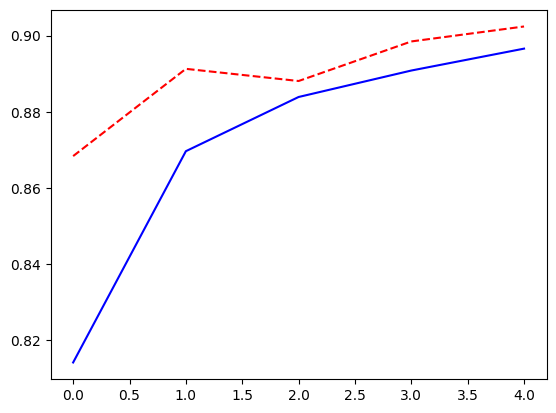

In [ ]:
plt.plot(hist.history['accuracy'], 'b-')
plt.plot(hist.history['val_accuracy'], 'r--')

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels,\
                                    verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 4s - loss: 0.2789 - accuracy: 0.8990 - 4s/epoch - 13ms/step
테스트 정확도: 0.8989999890327454


### 02 CIFAR-10 데이터를 다루자
#### CIFAR 10 이미지 학습하기
#### 참고 : https://www.tensorflow.org/tutorials/images/cnn?hl=ko

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# CIFAR-10데이터를 읽어서 훈련 이미지와 테스트 이미지로 나누기
(train_images, train_labels), (test_images, test_labels) =\
   datasets.cifar10.load_data()

# 픽셀값을 0에서 1사이 값으로 정규화하기
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_labels.shape    # (50000, 1) 형태의 훈련 데이터 레이블

(50000, 1)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
test_labels.shape    # (10000, 1) 형태의 테스트 데이터 레이블

(10000, 1)

In [ ]:
train_labels[0]

array([6], dtype=uint8)

In [ ]:
train_labels[0][0]

6

Text(0.5, 0, 'frog')

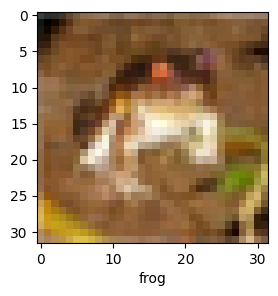

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(3, 3))    # 그림의 크기를 지정함
plt.imshow(train_images[0])   # 훈련용 이미지셋에서 첫 이미지를 그리자
plt.xlabel(class_names[train_labels[0][0]])

Text(0.5, 0, 'truck')

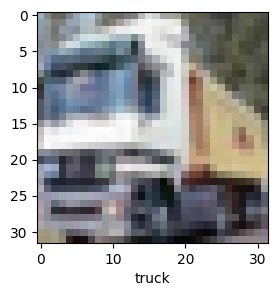

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(train_images[1])   # 두 번째 훈련용 이미지를 그리자
plt.xlabel(class_names[train_labels[1][0]])

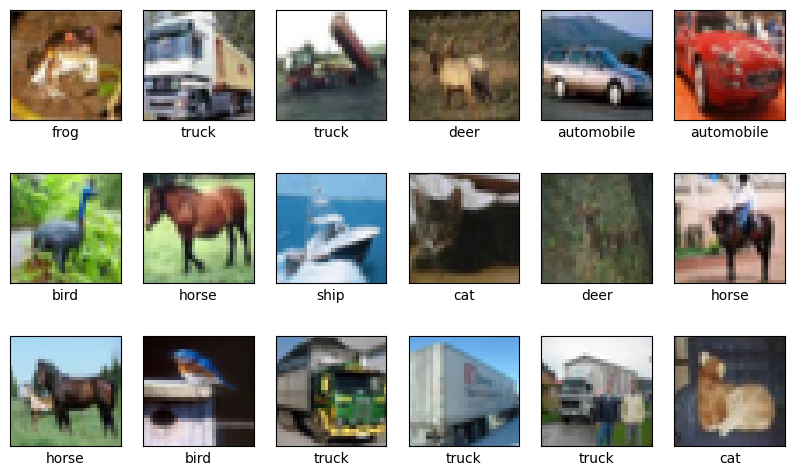

In [ ]:
plt.figure(figsize=(10, 6))
row, col = 3, 6       # 행과 열의 수를 지정하자
for i in range(row * col):
   plt.subplot(row, col, i+1)    # 3행 6열의 격자구조로 그리자
   plt.xticks([]); plt.yticks([])  # 눈금표시는 하지 않는다.
   plt.imshow(train_images[i])
   plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
# CIFAR-10 이미지 인식을 위한 모델 만들기
model = models.Sequential()
# 합성곱층과 풀링층을 교대로 만들자
model.add(layers.Conv2D(32, (3, 3), activation='relu', \
          input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 평탄화 후 완전 연결 신경망을 만들자
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 93s 58ms/step - loss: 1.5304 - accuracy: 0.4389 - val_loss: 1.2341 - val_accuracy: 0.5549
Epoch 2/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.1716 - accuracy: 0.5826 - val_loss: 1.1021 - val_accuracy: 0.6111
Epoch 3/10
1563/1563 [==============================] - 87s 55ms/step - loss: 1.0385 - accuracy: 0.6342 - val_loss: 1.0394 - val_accuracy: 0.6353
Epoch 4/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9420 - accuracy: 0.6698 - val_loss: 0.9608 - val_accuracy: 0.6679
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8697 - accuracy: 0.6952 - val_loss: 0.9307 - val_accuracy: 0.6787
Epoch 6/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.8104 - accuracy: 0.7148 - val_loss: 0.9085 - val_accuracy: 0.6858
Epoch 7/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7585 - accuracy: 0.7307 - val_loss: 0.9039 -

313/313 - 5s - loss: 0.8788 - accuracy: 0.7074 - 5s/epoch - 17ms/step


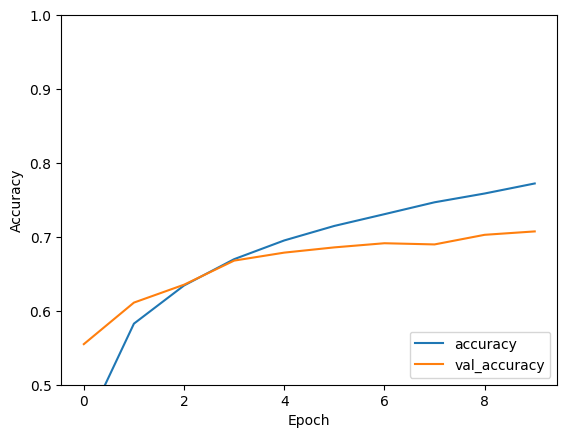

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels,\
                                    verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 5s - loss: 0.8788 - accuracy: 0.7074 - 5s/epoch - 16ms/step
테스트 정확도: 0.7074000239372253
